In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv('redfin_data.csv')

In [3]:
df.shape

(1656, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sold Price         1649 non-null   float64
 1   Beds               1649 non-null   float64
 2   Baths              1649 non-null   float64
 3   Floors             1632 non-null   float64
 4   Garage Spaces      1656 non-null   int64  
 5   Lot Size (sq ft)   1653 non-null   float64
 6   Home Size (sq ft)  1655 non-null   float64
 7   Year Built         1653 non-null   float64
 8   School Score Avg   1515 non-null   float64
 9   Walk Score         1538 non-null   float64
 10  Transit Score      1538 non-null   float64
 11  Bike Score         1538 non-null   float64
 12  Laundry            1656 non-null   bool   
 13  Heating            1656 non-null   bool   
 14  Air Conditioning   1656 non-null   bool   
 15  Pool               1656 non-null   bool   
 16  Address            1656 

In [5]:
## clean data

df.drop(columns=['Address', 'Sold Status', 'URL'], inplace = True)

df = df.dropna()
df.reset_index(drop=True, inplace=True)

df.columns= df.columns.str.lower()
df.rename(columns={'lot size (sq ft)': 'lot size', 'home size (sq ft)': 'home size'}, inplace=True)

df.drop(df.index[df['city'] == 'SAN JOSE'], inplace=True)

df.drop(df.index[df['city'] == 'EAST PALO ALTO'], inplace=True)

df.drop(df.index[df['county'] == 'SAN MATEO COUNTY'], inplace=True)

df.drop(columns=['county', 'zip code', 'property type'], inplace = True)

df['age of house'] = (df['year built'].max() + 1) - df['year built']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1297 non-null   float64
 1   beds              1297 non-null   float64
 2   baths             1297 non-null   float64
 3   floors            1297 non-null   float64
 4   garage spaces     1297 non-null   int64  
 5   lot size          1297 non-null   float64
 6   home size         1297 non-null   float64
 7   year built        1297 non-null   float64
 8   school score avg  1297 non-null   float64
 9   walk score        1297 non-null   float64
 10  transit score     1297 non-null   float64
 11  bike score        1297 non-null   float64
 12  laundry           1297 non-null   bool   
 13  heating           1297 non-null   bool   
 14  air conditioning  1297 non-null   bool   
 15  pool              1297 non-null   bool   
 16  city              1297 non-null   object 


In [7]:
## create basic dataframe for basic pairplot
df_temp = df.drop(columns=['year built', 'walk score', 'transit score', 'bike score',
                           'city', 'laundry', 'heating', 'air conditioning', 'pool'])

In [8]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1297 non-null   float64
 1   beds              1297 non-null   float64
 2   baths             1297 non-null   float64
 3   floors            1297 non-null   float64
 4   garage spaces     1297 non-null   int64  
 5   lot size          1297 non-null   float64
 6   home size         1297 non-null   float64
 7   school score avg  1297 non-null   float64
 8   age of house      1297 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 101.3 KB


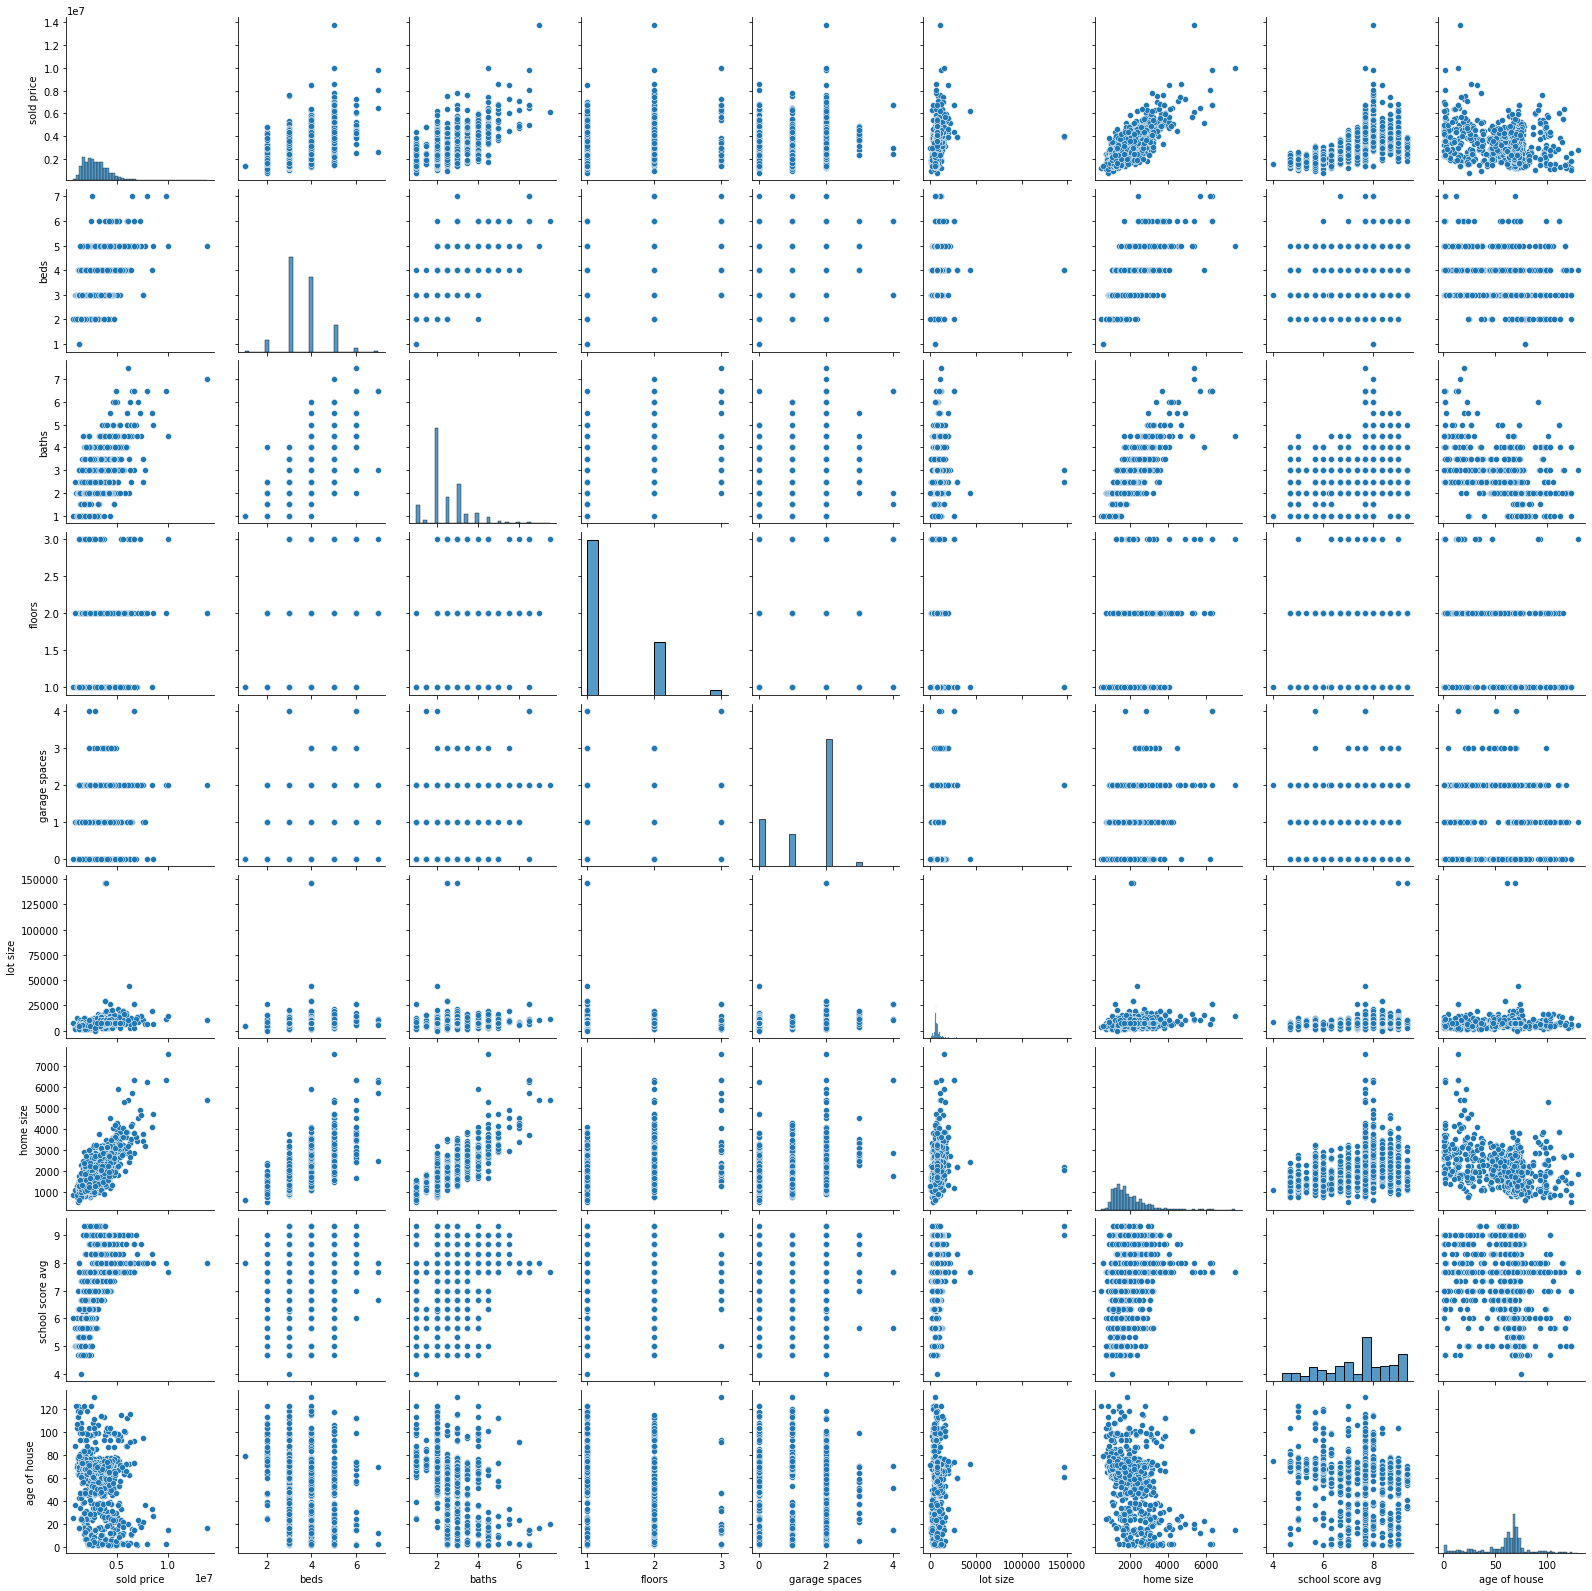

In [9]:
sns.pairplot(df_temp);

In [10]:
df['sold price'].describe()

count    1.297000e+03
mean     3.042164e+06
std      1.260630e+06
min      7.750000e+05
25%      2.100000e+06
50%      2.828000e+06
75%      3.709113e+06
max      1.380700e+07
Name: sold price, dtype: float64

In [11]:
df.sort_values(by=['sold price'], ascending=False)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
126,13807000.0,5.0,7.0,2.0,2,10497.960,5366.0,2007.0,8.000000,59.0,38.0,96.0,True,True,True,True,PALO ALTO,16.0
1326,10000000.0,5.0,4.5,3.0,2,14671.008,7536.0,2009.0,7.666667,49.0,40.0,81.0,True,True,True,True,LOS ALTOS,14.0
105,9800000.0,7.0,6.5,2.0,2,11913.660,6304.0,2021.0,8.000000,40.0,35.0,75.0,True,True,True,True,PALO ALTO,2.0
344,8592002.0,5.0,5.0,2.0,0,6734.376,4708.0,1996.0,8.000000,44.0,35.0,70.0,False,False,False,True,PALO ALTO,27.0
1325,8500000.0,4.0,5.5,1.0,2,19074.924,4079.0,1990.0,8.333333,69.0,25.0,98.0,True,True,True,True,LOS ALTOS,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,1105000.0,2.0,1.0,1.0,1,4321.152,864.0,1916.0,5.666667,74.0,43.0,92.0,True,True,True,False,SANTA CLARA,107.0
1085,1020000.0,3.0,2.0,1.0,0,4499.748,880.0,1900.0,5.000000,69.0,50.0,75.0,False,True,False,True,SANTA CLARA,123.0
1036,1000000.0,3.0,1.0,1.0,1,3384.612,937.0,1935.0,5.000000,58.0,41.0,55.0,True,True,True,True,SANTA CLARA,88.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0


In [12]:
df.drop([126], inplace=True)
df.sort_values(by=['sold price'], ascending=False)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
1326,10000000.0,5.0,4.5,3.0,2,14671.008,7536.0,2009.0,7.666667,49.0,40.0,81.0,True,True,True,True,LOS ALTOS,14.0
105,9800000.0,7.0,6.5,2.0,2,11913.660,6304.0,2021.0,8.000000,40.0,35.0,75.0,True,True,True,True,PALO ALTO,2.0
344,8592002.0,5.0,5.0,2.0,0,6734.376,4708.0,1996.0,8.000000,44.0,35.0,70.0,False,False,False,True,PALO ALTO,27.0
1325,8500000.0,4.0,5.5,1.0,2,19074.924,4079.0,1990.0,8.333333,69.0,25.0,98.0,True,True,True,True,LOS ALTOS,33.0
327,8010300.0,7.0,6.5,2.0,0,6734.376,6200.0,2021.0,8.000000,0.0,0.0,2.0,False,False,False,True,PALO ALTO,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,1105000.0,2.0,1.0,1.0,1,4321.152,864.0,1916.0,5.666667,74.0,43.0,92.0,True,True,True,False,SANTA CLARA,107.0
1085,1020000.0,3.0,2.0,1.0,0,4499.748,880.0,1900.0,5.000000,69.0,50.0,75.0,False,True,False,True,SANTA CLARA,123.0
1036,1000000.0,3.0,1.0,1.0,1,3384.612,937.0,1935.0,5.000000,58.0,41.0,55.0,True,True,True,True,SANTA CLARA,88.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0


In [13]:
df.sort_values(by=['sold price'], ascending=True)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
1161,775000.0,2.0,1.0,1.0,0,7649.136,863.0,1998.0,6.000000,87.0,51.0,84.0,False,False,False,True,SANTA CLARA,25.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0
1036,1000000.0,3.0,1.0,1.0,1,3384.612,937.0,1935.0,5.000000,58.0,41.0,55.0,True,True,True,True,SANTA CLARA,88.0
1085,1020000.0,3.0,2.0,1.0,0,4499.748,880.0,1900.0,5.000000,69.0,50.0,75.0,False,True,False,True,SANTA CLARA,123.0
1201,1105000.0,2.0,1.0,1.0,1,4321.152,864.0,1916.0,5.666667,74.0,43.0,92.0,True,True,True,False,SANTA CLARA,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,8010300.0,7.0,6.5,2.0,0,6734.376,6200.0,2021.0,8.000000,0.0,0.0,2.0,False,False,False,True,PALO ALTO,2.0
1325,8500000.0,4.0,5.5,1.0,2,19074.924,4079.0,1990.0,8.333333,69.0,25.0,98.0,True,True,True,True,LOS ALTOS,33.0
344,8592002.0,5.0,5.0,2.0,0,6734.376,4708.0,1996.0,8.000000,44.0,35.0,70.0,False,False,False,True,PALO ALTO,27.0
105,9800000.0,7.0,6.5,2.0,2,11913.660,6304.0,2021.0,8.000000,40.0,35.0,75.0,True,True,True,True,PALO ALTO,2.0


In [14]:
df.sort_values(by=['lot size'], ascending=False)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
951,3888000.0,4.0,3.0,1.0,2,146361.600,2187.0,1962.0,9.333333,13.0,0.0,24.0,True,True,True,True,CUPERTINO,61.0
952,3950000.0,4.0,2.5,1.0,2,146361.600,2071.0,1954.0,9.000000,44.0,19.0,52.0,True,True,False,True,CUPERTINO,69.0
165,6200000.0,4.0,2.0,1.0,0,43703.748,2411.0,1951.0,7.666667,30.0,32.0,77.0,True,True,True,False,PALO ALTO,72.0
948,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
866,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1884020.0,3.0,3.5,3.0,2,1398.276,2231.0,2010.0,7.666667,65.0,39.0,72.0,True,True,True,True,SANTA CLARA,13.0
800,1818000.0,4.0,3.5,2.0,2,1319.868,1725.0,2007.0,4.666667,51.0,41.0,73.0,True,True,True,True,SUNNYVALE,16.0
494,1600000.0,3.0,3.5,3.0,2,1306.800,1612.0,2007.0,7.333333,56.0,37.0,85.0,True,True,True,False,MOUNTAIN VIEW,16.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0


In [15]:
df.drop([951,952], inplace=True)
df.sort_values(by=['lot size'], ascending=False)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
165,6200000.0,4.0,2.0,1.0,0,43703.748,2411.0,1951.0,7.666667,30.0,32.0,77.0,True,True,True,False,PALO ALTO,72.0
866,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
948,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
1383,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
293,6700000.0,6.0,6.5,3.0,4,25944.336,6338.0,2009.0,7.666667,22.0,36.0,80.0,True,True,True,True,LOS ALTOS,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1884020.0,3.0,3.5,3.0,2,1398.276,2231.0,2010.0,7.666667,65.0,39.0,72.0,True,True,True,True,SANTA CLARA,13.0
800,1818000.0,4.0,3.5,2.0,2,1319.868,1725.0,2007.0,4.666667,51.0,41.0,73.0,True,True,True,True,SUNNYVALE,16.0
494,1600000.0,3.0,3.5,3.0,2,1306.800,1612.0,2007.0,7.333333,56.0,37.0,85.0,True,True,True,False,MOUNTAIN VIEW,16.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0


In [16]:
df.sort_values(by=['lot size'], ascending=True)

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,city,age of house
1410,2950000.0,2.0,2.0,1.0,0,0.000,1318.0,1952.0,8.333333,87.0,27.0,97.0,True,True,False,True,LOS ALTOS,71.0
1187,928000.0,2.0,2.5,2.0,1,1097.712,1126.0,1987.0,5.666667,88.0,50.0,91.0,True,True,True,True,SANTA CLARA,36.0
494,1600000.0,3.0,3.5,3.0,2,1306.800,1612.0,2007.0,7.333333,56.0,37.0,85.0,True,True,True,False,MOUNTAIN VIEW,16.0
800,1818000.0,4.0,3.5,2.0,2,1319.868,1725.0,2007.0,4.666667,51.0,41.0,73.0,True,True,True,True,SUNNYVALE,16.0
1256,1884020.0,3.0,3.5,3.0,2,1398.276,2231.0,2010.0,7.666667,65.0,39.0,72.0,True,True,True,True,SANTA CLARA,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,6700000.0,6.0,6.5,3.0,4,25944.336,6338.0,2009.0,7.666667,22.0,36.0,80.0,True,True,True,True,LOS ALTOS,14.0
1383,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
948,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0
866,3900000.0,4.0,2.5,1.0,2,28880.280,2182.0,1963.0,8.333333,10.0,20.0,26.0,True,True,True,True,LOS ALTOS,60.0


In [ ]:
df.drop([1410], inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1294 non-null   float64
 1   beds              1294 non-null   float64
 2   baths             1294 non-null   float64
 3   floors            1294 non-null   float64
 4   garage spaces     1294 non-null   int64  
 5   lot size          1294 non-null   float64
 6   home size         1294 non-null   float64
 7   year built        1294 non-null   float64
 8   school score avg  1294 non-null   float64
 9   walk score        1294 non-null   float64
 10  transit score     1294 non-null   float64
 11  bike score        1294 non-null   float64
 12  laundry           1294 non-null   bool   
 13  heating           1294 non-null   bool   
 14  air conditioning  1294 non-null   bool   
 15  pool              1294 non-null   bool   
 16  city              1294 non-null   object 


In [18]:
df['beds'].value_counts()

3.0    576
4.0    455
5.0    163
2.0     70
6.0     24
7.0      4
1.0      2
Name: beds, dtype: int64

In [19]:
df['baths'].value_counts()

2.0    583
3.0    238
2.5    160
1.0    109
4.0     59
3.5     56
4.5     37
1.5     21
5.0     15
6.5      6
6.0      5
5.5      4
7.5      1
Name: baths, dtype: int64

In [20]:
df['floors'].value_counts()

1.0    944
2.0    322
3.0     28
Name: floors, dtype: int64

In [21]:
df['garage spaces'].value_counts()

2    775
0    287
1    199
3     29
4      4
Name: garage spaces, dtype: int64

In [22]:
df.corr()

,sold price,beds,baths,floors,garage spaces,lot size,home size,year built,school score avg,walk score,transit score,bike score,laundry,heating,air conditioning,pool,age of house
sold price,1.000000,0.529879,0.608531,0.295516,0.070814,0.494726,0.776354,0.261373,0.637237,-0.272797,-0.351498,0.056603,0.030037,-0.052196,0.033300,0.095954,-0.261373
beds,0.529879,1.000000,0.684602,0.419411,0.160188,0.288077,0.729638,0.314220,0.243905,-0.251076,-0.230906,-0.121135,0.040148,0.048382,0.157681,0.072154,-0.314220
baths,0.608531,0.684602,1.000000,0.517562,0.109552,0.229753,0.825037,0.468019,0.247345,-0.165650,-0.166060,-0.026890,0.028084,-0.005844,0.202379,0.062120,-0.468019
floors,0.295516,0.419411,0.517562,1.000000,0.101562,-0.050514,0.536095,0.488216,0.141336,-0.081520,-0.023297,0.007359,0.042888,0.038840,0.174150,0.047686,-0.488216
garage spaces,0.070814,0.160188,0.109552,0.101562,1.000000,0.197621,0.153579,0.157471,0.063769,-0.125552,-0.096466,-0.174626,0.141464,0.735951,0.441572,0.063757,-0.157471
lot size,0.494726,0.288077,0.229753,-0.050514,0.197621,1.000000,0.390838,-0.040185,0.326463,-0.290589,-0.304748,-0.207723,-0.014838,0.124233,0.067567,0.054958,0.040185
home size,0.776354,0.729638,0.825037,0.536095,0.153579,0.390838,1.000000,0.437518,0.352805,-0.229020,-0.235823,-0.053660,0.031363,0.004073,0.190976,0.097272,-0.437518
year built,0.261373,0.314220,0.468019,0.488216,0.157471,-0.040185,0.437518,1.000000,0.132795,-0.143879,-0.123217,-0.051056,0.014941,0.034995,0.213217,0.055120,-1.000000
school score avg,0.637237,0.243905,0.247345,0.141336,0.063769,0.326463,0.352805,0.132795,1.000000,-0.335194,-0.488492,-0.036590,-0.049763,-0.036705,-0.052847,0.142938,-0.132795
walk score,-0.272797,-0.251076,-0.165650,-0.081520,-0.125552,-0.290589,-0.229020,-0.143879,-0.335194,1.000000,0.584721,0.610014,0.008802,-0.004601,-0.014735,-0.055616,0.143879


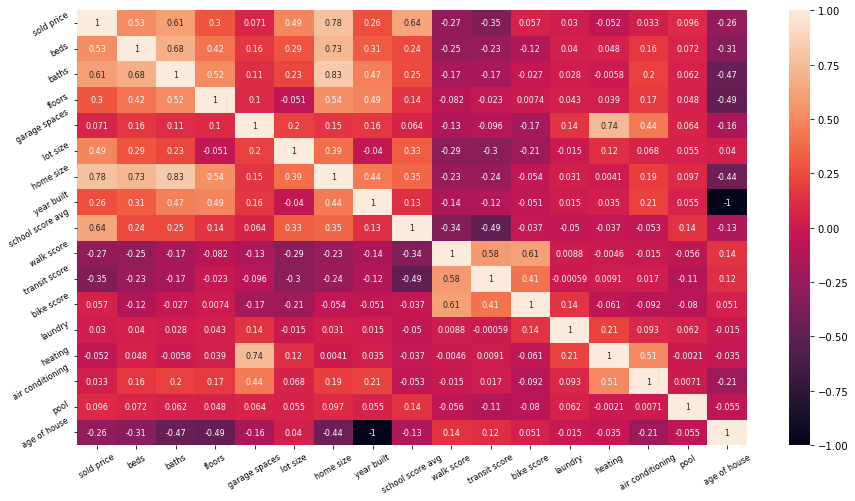

In [23]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(df.corr(), annot=True, annot_kws={'size':8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, size=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, size=8);

In [24]:
df.drop(columns=['year built'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1439
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1294 non-null   float64
 1   beds              1294 non-null   float64
 2   baths             1294 non-null   float64
 3   floors            1294 non-null   float64
 4   garage spaces     1294 non-null   int64  
 5   lot size          1294 non-null   float64
 6   home size         1294 non-null   float64
 7   school score avg  1294 non-null   float64
 8   walk score        1294 non-null   float64
 9   transit score     1294 non-null   float64
 10  bike score        1294 non-null   float64
 11  laundry           1294 non-null   bool   
 12  heating           1294 non-null   bool   
 13  air conditioning  1294 non-null   bool   
 14  pool              1294 non-null   bool   
 15  city              1294 non-null   object 
 16  age of house      1294 non-null   float64


In [25]:
df.describe()

,sold price,beds,baths,floors,garage spaces,lot size,home size,school score avg,walk score,transit score,bike score,age of house
count,1.294000e+03,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,3.032490e+06,3.614374,2.467156,1.292117,1.431221,7368.318751,1897.548686,7.294307,55.632148,36.512365,78.629830,59.710974
std,1.225549e+06,0.869067,0.930224,0.500255,0.867644,3291.387428,780.934906,1.247921,18.812111,8.472388,13.008466,22.453835
min,7.750000e+05,1.000000,1.000000,1.000000,0.000000,0.000000,528.000000,4.000000,0.000000,0.000000,2.000000,1.000000
25%,2.100000e+06,3.000000,2.000000,1.000000,1.000000,5684.580000,1351.750000,6.333333,43.000000,32.000000,71.000000,55.000000
50%,2.828000e+06,3.000000,2.000000,1.000000,2.000000,6682.104000,1739.000000,7.666667,58.000000,38.000000,78.000000,66.000000
75%,3.700000e+06,4.000000,3.000000,2.000000,2.000000,8282.934000,2263.750000,8.333333,70.000000,42.000000,88.000000,70.750000
max,1.000000e+07,7.000000,7.500000,3.000000,4.000000,43703.748000,7536.000000,9.333333,95.000000,58.000000,100.000000,130.000000


In [26]:
df['walk score'].sort_values()

327      0.0
965      3.0
882      7.0
346      7.0
1001     8.0
        ... 
561     93.0
563     93.0
623     93.0
462     95.0
244     95.0
Name: walk score, Length: 1294, dtype: float64

In [27]:
df['transit score'].sort_values()

895      0.0
1004     0.0
327      0.0
953      0.0
882      0.0
        ... 
695     53.0
1308    53.0
366     55.0
509     55.0
315     58.0
Name: transit score, Length: 1294, dtype: float64

In [28]:
df['bike score'].sort_values()

327       2.0
1354     20.0
948      26.0
866      26.0
1383     26.0
        ...  
132     100.0
336     100.0
184     100.0
281     100.0
304     100.0
Name: bike score, Length: 1294, dtype: float64

In [29]:
df_temp = df.drop(columns=['walk score', 'transit score', 'bike score'])

In [30]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1294 non-null   float64
 1   beds              1294 non-null   float64
 2   baths             1294 non-null   float64
 3   floors            1294 non-null   float64
 4   garage spaces     1294 non-null   int64  
 5   lot size          1294 non-null   float64
 6   home size         1294 non-null   float64
 7   school score avg  1294 non-null   float64
 8   laundry           1294 non-null   bool   
 9   heating           1294 non-null   bool   
 10  air conditioning  1294 non-null   bool   
 11  pool              1294 non-null   bool   
 12  city              1294 non-null   object 
 13  age of house      1294 non-null   float64
dtypes: bool(4), float64(8), int64(1), object(1)
memory usage: 116.3+ KB


In [31]:
bool_cols = {
                'laundry': int,
                'heating': int,
                'air conditioning': int,
                'pool': int
               }
  
df_temp = df_temp.astype(bool_cols)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1294 non-null   float64
 1   beds              1294 non-null   float64
 2   baths             1294 non-null   float64
 3   floors            1294 non-null   float64
 4   garage spaces     1294 non-null   int64  
 5   lot size          1294 non-null   float64
 6   home size         1294 non-null   float64
 7   school score avg  1294 non-null   float64
 8   laundry           1294 non-null   int64  
 9   heating           1294 non-null   int64  
 10  air conditioning  1294 non-null   int64  
 11  pool              1294 non-null   int64  
 12  city              1294 non-null   object 
 13  age of house      1294 non-null   float64
dtypes: float64(8), int64(5), object(1)
memory usage: 151.6+ KB


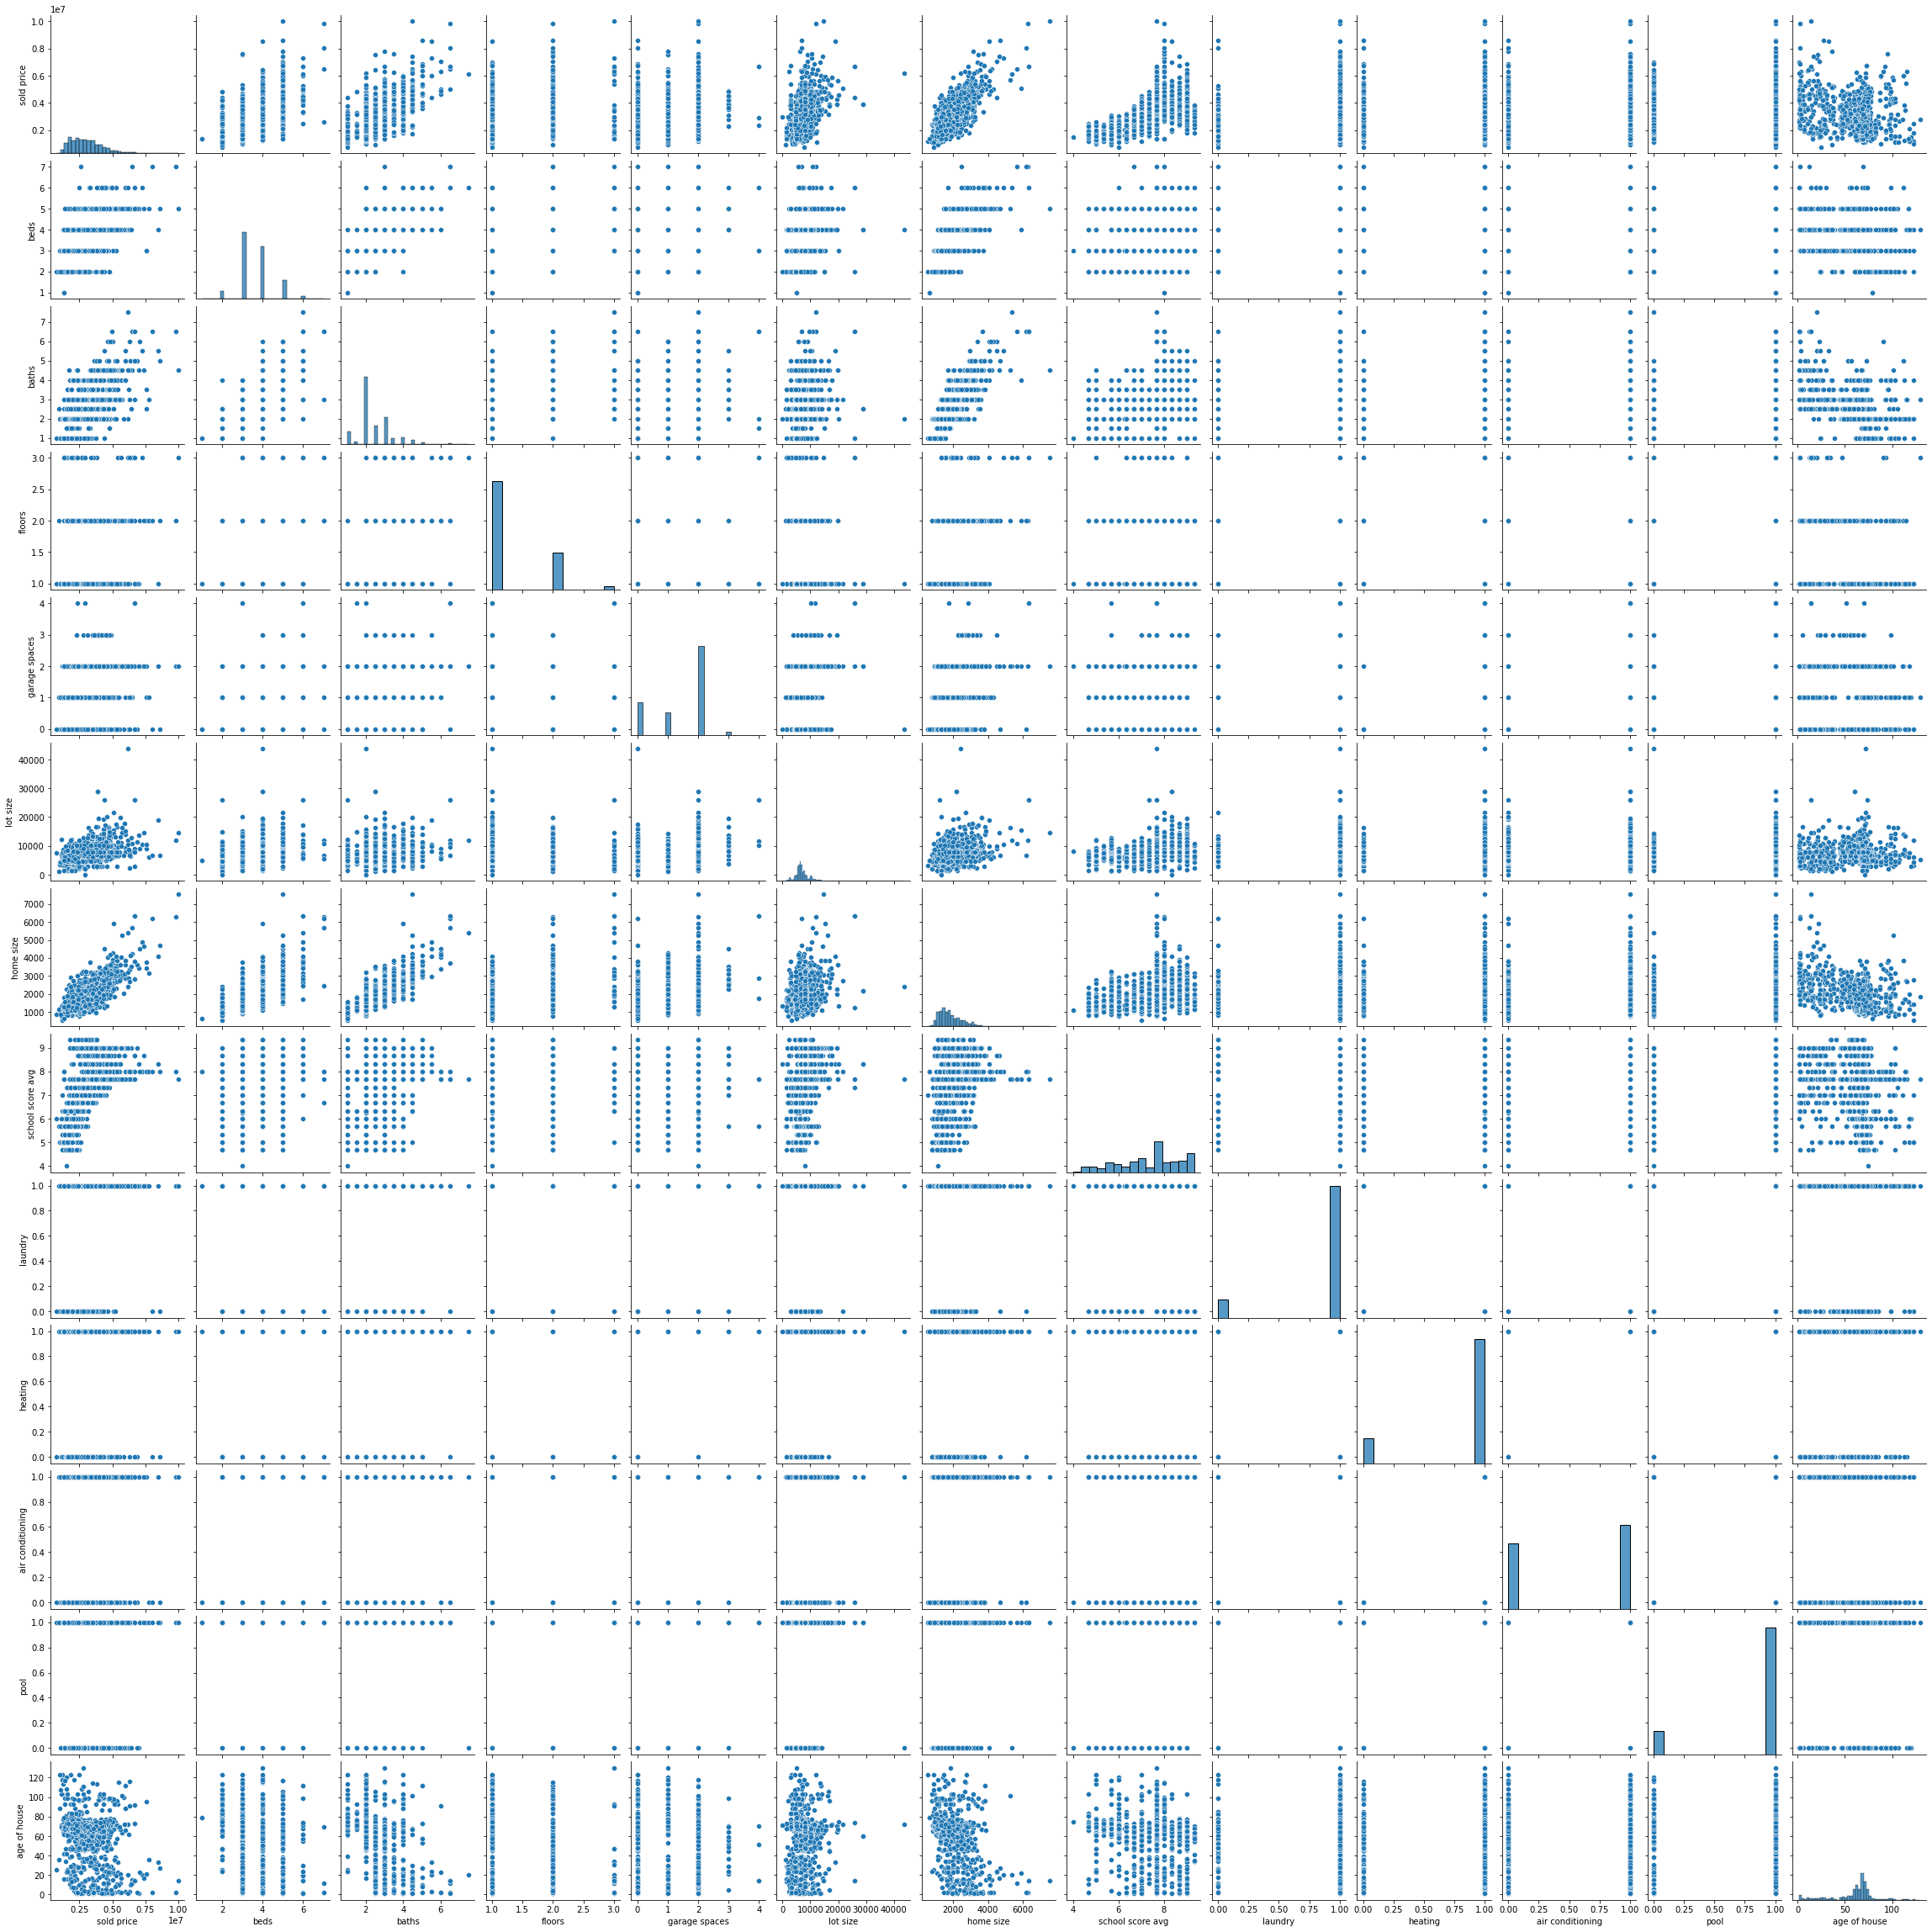

In [32]:
sns.pairplot(df_temp.drop(columns='city'));

In [33]:
bool_cols = {
                'beds': str,
                'baths': str,
                'floors': str,
                'garage spaces': str
               }
  
df_temp = df_temp.astype(bool_cols)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1439
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sold price        1294 non-null   float64
 1   beds              1294 non-null   object 
 2   baths             1294 non-null   object 
 3   floors            1294 non-null   object 
 4   garage spaces     1294 non-null   object 
 5   lot size          1294 non-null   float64
 6   home size         1294 non-null   float64
 7   school score avg  1294 non-null   float64
 8   laundry           1294 non-null   int64  
 9   heating           1294 non-null   int64  
 10  air conditioning  1294 non-null   int64  
 11  pool              1294 non-null   int64  
 12  city              1294 non-null   object 
 13  age of house      1294 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 183.9+ KB


In [34]:
df_temp['beds'].value_counts()

3.0    576
4.0    455
5.0    163
2.0     70
6.0     24
7.0      4
1.0      2
Name: beds, dtype: int64

In [35]:
bed_count = df_temp['beds'].value_counts()

bed_one = list(bed_count[bed_count == 2].index)
df_temp['beds'] = df_temp['beds'].replace(bed_one, '1-2')

bed_two = list(bed_count[bed_count == 69].index)
df_temp['beds'] = df_temp['beds'].replace(bed_two, '1-2')

bed_six = list(bed_count[bed_count == 24].index)
df_temp['beds'] = df_temp['beds'].replace(bed_six, '6+')

bed_seven = list(bed_count[bed_count == 4].index)
df_temp['beds'] = df_temp['beds'].replace(bed_seven, '6+')

df_temp['beds'].value_counts()

3.0    576
4.0    455
5.0    163
2.0     70
6+      28
1-2      2
Name: beds, dtype: int64

In [36]:
df_temp['baths'].value_counts()

2.0    583
3.0    238
2.5    160
1.0    109
4.0     59
3.5     56
4.5     37
1.5     21
5.0     15
6.5      6
6.0      5
5.5      4
7.5      1
Name: baths, dtype: int64

In [37]:
bath_count = df_temp['baths'].value_counts()

bath_6plus = list(bath_count[bath_count <= 6].index)
df_temp['baths'] = df_temp['baths'].replace(bath_6plus, '6+')

df_temp['baths'].value_counts()

2.0    583
3.0    238
2.5    160
1.0    109
4.0     59
3.5     56
4.5     37
1.5     21
6+      16
5.0     15
Name: baths, dtype: int64

In [38]:
df_temp['floors'].value_counts()

1.0    944
2.0    322
3.0     28
Name: floors, dtype: int64

In [39]:
df_temp['garage spaces'].value_counts()

2    775
0    287
1    199
3     29
4      4
Name: garage spaces, dtype: int64

In [40]:
garage_count = df_temp['garage spaces'].value_counts()

garage_3plus = list(garage_count[garage_count <= 29].index)
df_temp['garage spaces'] = df_temp['garage spaces'].replace(garage_3plus, '3+')

df_temp['garage spaces'].value_counts()

2     775
0     287
1     199
3+     33
Name: garage spaces, dtype: int64

In [41]:
df_dummies = pd.get_dummies(df_temp, columns=['beds', 'baths', 'floors', 'garage spaces', 'city'], drop_first=True)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1439
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sold price          1294 non-null   float64
 1   lot size            1294 non-null   float64
 2   home size           1294 non-null   float64
 3   school score avg    1294 non-null   float64
 4   laundry             1294 non-null   int64  
 5   heating             1294 non-null   int64  
 6   air conditioning    1294 non-null   int64  
 7   pool                1294 non-null   int64  
 8   age of house        1294 non-null   float64
 9   beds_2.0            1294 non-null   uint8  
 10  beds_3.0            1294 non-null   uint8  
 11  beds_4.0            1294 non-null   uint8  
 12  beds_5.0            1294 non-null   uint8  
 13  beds_6+             1294 non-null   uint8  
 14  baths_1.5           1294 non-null   uint8  
 15  baths_2.0           1294 non-null   uint8  
 16  baths_

In [42]:
df_dummies.corr()

,sold price,lot size,home size,school score avg,laundry,heating,air conditioning,pool,age of house,beds_2.0,...,floors_2.0,floors_3.0,garage spaces_1,garage spaces_2,garage spaces_3+,city_LOS ALTOS,city_MOUNTAIN VIEW,city_PALO ALTO,city_SANTA CLARA,city_SUNNYVALE
sold price,1.000000,0.494726,0.776354,0.637237,0.030037,-0.052196,0.033300,0.095954,-0.261373,-0.124344,...,0.278499,0.094054,-0.111437,0.034855,0.133893,0.419252,-0.016901,0.433177,-0.448225,-0.245240
lot size,0.494726,1.000000,0.390838,0.326463,-0.014838,0.124233,0.067567,0.054958,0.040185,-0.067133,...,-0.043825,-0.021693,-0.158251,0.122457,0.207321,0.433828,-0.101000,0.049471,-0.166128,-0.139437
home size,0.776354,0.390838,1.000000,0.352805,0.031363,0.004073,0.190976,0.097272,-0.437518,-0.219612,...,0.464836,0.230629,-0.113433,0.052071,0.239934,0.290054,-0.042590,0.197085,-0.228211,-0.158062
school score avg,0.637237,0.326463,0.352805,1.000000,-0.049763,-0.036705,-0.052847,0.142938,-0.132795,-0.058247,...,0.148879,0.021684,-0.179001,0.075939,0.096755,0.310091,0.034785,0.348688,-0.517318,-0.265187
laundry,0.030037,-0.014838,0.031363,-0.049763,1.000000,0.211929,0.093309,0.061639,-0.014941,-0.070365,...,0.034896,0.021854,0.077294,0.074179,0.044318,-0.015178,0.121743,0.085064,0.051545,-0.106172
heating,-0.052196,0.124233,0.004073,-0.036705,0.211929,1.000000,0.507477,-0.002131,-0.034995,-0.093833,...,0.019131,0.038322,0.191356,0.544295,0.072614,-0.036106,-0.021380,-0.048991,0.041834,0.045267
air conditioning,0.033300,0.067567,0.190976,-0.052847,0.093309,0.507477,1.000000,0.007119,-0.213217,-0.105146,...,0.141704,0.088732,0.079216,0.299255,0.123332,-0.025678,-0.006355,-0.120959,0.107014,0.034395
pool,0.095954,0.054958,0.097272,0.142938,0.061639,-0.002131,0.007119,1.000000,-0.055120,-0.040106,...,0.052123,0.004506,-0.073615,0.061999,0.041786,0.002229,0.064327,-0.019911,0.023246,-0.105584
age of house,-0.261373,0.040185,-0.437518,-0.132795,-0.014941,-0.034995,-0.213217,-0.055120,1.000000,0.190904,...,-0.421037,-0.213424,0.012648,-0.094205,-0.096636,0.014106,-0.078263,0.009630,0.151779,-0.022752
beds_2.0,-0.124344,-0.067133,-0.219612,-0.058247,-0.070365,-0.093833,-0.105146,-0.040106,0.190904,1.000000,...,-0.098133,-0.035565,0.068517,-0.159792,-0.038686,-0.016993,0.038468,0.077458,0.008920,-0.082942


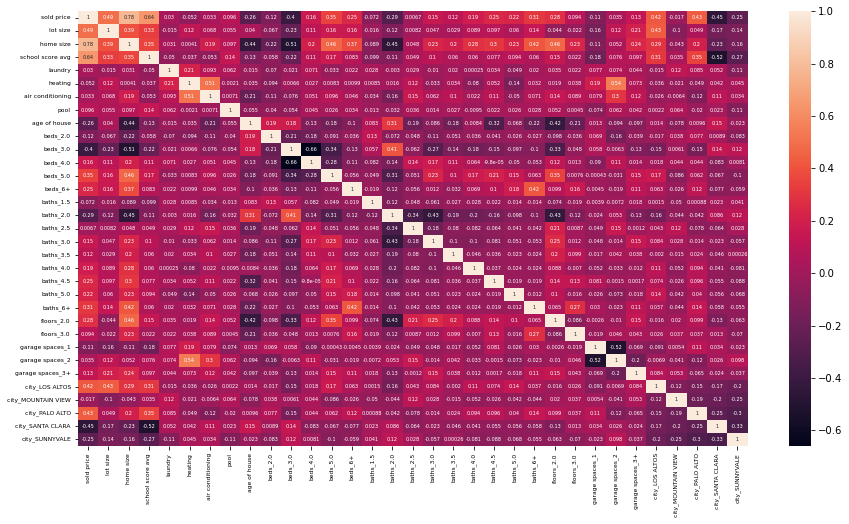

In [43]:
plt.figure(figsize=(15,8))

ax = sns.heatmap(df_dummies.corr(), annot=True, annot_kws={'size':5})
ax.set_xticklabels(ax.get_xticklabels(), size=6)
ax.set_yticklabels(ax.get_yticklabels(), size=6);